In [1]:
#required imports
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
# Importing dataset
df=pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217143 entries, 0 to 217142
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           217143 non-null  object 
 1   Location       217143 non-null  object 
 2   MinTemp        213597 non-null  float64
 3   MaxTemp        213784 non-null  float64
 4   Rainfall       210781 non-null  float64
 5   Evaporation    101279 non-null  float64
 6   Sunshine       92165 non-null   float64
 7   WindGustDir    200813 non-null  object 
 8   WindGustSpeed  200920 non-null  float64
 9   WindDir9am     200103 non-null  object 
 10  WindDir3pm     207905 non-null  object 
 11  WindSpeed9am   212983 non-null  float64
 12  WindSpeed3pm   209412 non-null  float64
 13  Humidity9am    212294 non-null  float64
 14  Humidity3pm    208212 non-null  float64
 15  Pressure9am    193119 non-null  float64
 16  Pressure3pm    193138 non-null  float64
 17  Cloud9am       123473 non-nul

In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,213597.000000,213784.000000,210781.000000,101279.000000,92165.000000,200920.000000,212983.000000,209412.000000,212294.000000,208212.000000,193119.000000,193138.000000,123473.000000,117663.000000,213519.000000,209360.000000,210782.000000
mean,12.013287,23.132537,2.333787,5.489808,7.617073,40.029041,14.035618,18.581447,68.979076,51.399818,1017.731120,1015.304954,4.655536,4.653697,16.837248,21.613194,2.333630
std,6.437902,7.139490,8.547405,4.226591,3.771815,13.577398,8.886909,8.738994,19.516599,21.083946,7.062112,7.015274,2.897432,2.757064,6.536444,6.993169,8.547207
min,-8.700000,-4.100000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,979.100000,978.900000,0.000000,0.000000,-6.200000,-5.100000,0.000000
25%,7.400000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,36.000000,1013.000000,1010.500000,1.000000,2.000000,12.100000,16.500000,0.000000
50%,11.800000,22.500000,0.000000,4.800000,8.500000,39.000000,13.000000,17.000000,70.000000,52.000000,1017.700000,1015.200000,6.000000,5.000000,16.600000,21.000000,0.000000
75%,16.700000,28.100000,0.600000,7.400000,10.600000,48.000000,19.000000,24.000000,84.000000,66.000000,1022.600000,1020.200000,7.000000,7.000000,21.400000,26.300000,0.600000
max,33.900000,48.900000,474.000000,138.700000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.100000,1040.100000,9.000000,9.000000,40.200000,48.200000,474.000000


In [5]:
# Drop columns with large amounts of missing data and redundant information
df.drop('Date',axis=1,inplace=True)
df.drop('Location',axis=1,inplace=True)
df.drop('Cloud9am',axis=1,inplace=True)
df.drop('Cloud3pm',axis=1,inplace=True)
df.drop('Evaporation', axis=1, inplace=True)
df.drop('Sunshine',axis=1,inplace=True)
df.drop('RISK_MM',axis=1,inplace=True)

df["AverageTemp"] = (df["MinTemp"] +  df["MaxTemp"] ) /2
df.drop('MinTemp', axis=1, inplace=True)
df.drop('MaxTemp', axis=1, inplace=True)

# Pre Processs
df_Pre = pd.get_dummies(data=df, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday'])
df_Pre.replace(['No','Yes'], [0,1],inplace=True)

df_Pre = df_Pre.astype(float)
df_Pre['AverageTemp'].fillna(int(df_Pre['AverageTemp'].mean()), inplace=True)
df_Pre['Rainfall'].fillna(int(df_Pre['Rainfall'].mean()), inplace=True)
df_Pre['WindSpeed3pm'].fillna(int(df_Pre['WindSpeed3pm'].mean()), inplace=True)
df_Pre['WindSpeed9am'].fillna(int(df_Pre['WindSpeed9am'].mean()), inplace=True)
df_Pre['Humidity3pm'].fillna(int(df_Pre['Humidity3pm'].mean()), inplace=True)
df_Pre['Humidity9am'].fillna(int(df_Pre['Humidity9am'].mean()), inplace=True)
df_Pre['Temp3pm'].fillna(int(df_Pre['Temp3pm'].mean()), inplace=True)
df_Pre['Temp9am'].fillna(int(df_Pre['Temp9am'].mean()), inplace=True)
df_Pre['Pressure3pm'].fillna(int(df_Pre['Pressure3pm'].mean()), inplace=True)
df_Pre['Pressure9am'].fillna(int(df_Pre['Pressure9am'].mean()), inplace=True)
df_Pre['WindGustSpeed'].fillna(int(df_Pre['WindGustSpeed'].mean()), inplace=True)

for i in range(len(df_Pre.columns)):
    if df_Pre[df_Pre.columns[i]].isnull().sum().sum() > 0:
        print(df_Pre.columns[i])
        print(df_Pre[df_Pre.columns[i]].isnull().sum().sum())
df_Pre=df_Pre.dropna()

df_Pre = df_Pre.astype(float)

RainTomorrow
6361


In [6]:
df_Pre.describe()

,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
count,210782.000000,210782.000000,210782.000000,210782.000000,210782.00000,210782.000000,210782.000000,210782.000000,210782.000000,210782.000000,...,210782.000000,210782.000000,210782.000000,210782.000000,210782.000000,210782.000000,210782.000000,210782.000000,210782.000000,210782.000000
mean,2.319267,39.978352,14.009156,18.564417,68.91912,51.301202,1017.691267,1015.321793,16.836438,21.613980,...,0.066263,0.072146,0.062382,0.057415,0.062505,0.068787,0.060864,0.065437,0.772134,0.218330
std,8.465223,13.096109,8.810632,8.599569,19.40892,20.737525,6.681529,6.622778,6.508958,6.893343,...,0.248741,0.258730,0.241849,0.232634,0.242072,0.253092,0.239081,0.247296,0.419457,0.413113
min,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,979.100000,978.900000,-6.200000,-5.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,31.000000,7.000000,13.000000,57.00000,37.000000,1013.700000,1011.200000,12.100000,16.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,39.000000,13.000000,18.000000,70.00000,51.000000,1017.000000,1015.000000,16.500000,21.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.800000,46.000000,19.000000,24.000000,83.00000,65.000000,1021.900000,1019.500000,21.400000,26.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,474.000000,135.000000,87.000000,87.000000,100.00000,100.000000,1041.100000,1040.100000,40.200000,48.200000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

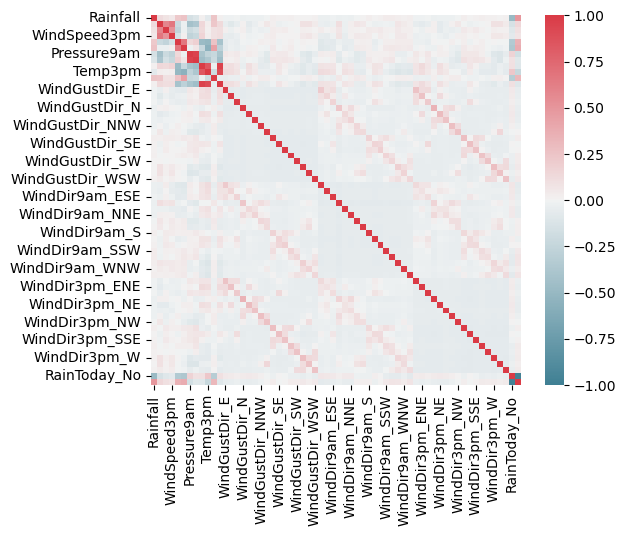

In [7]:
#large scale correlation matrix to visualize correlations between columns
corr_matrix = df_Pre.corr()
f, ax = plt.subplots()
sns.heatmap(corr_matrix,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

In [8]:
#splitting data

X=df_Pre.drop(columns=['AverageTemp','Temp3pm','Temp9am']).values
Y=df_Pre['AverageTemp'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [9]:
regressor = MLPRegressor(max_iter = 2000)
regressor.fit(X_train, Y_train)

MLPRegressor(max_iter=2000)

In [10]:
y_pred = regressor.predict(X_test)
df_res=pd.DataFrame({'Actual':Y_test, 'Predicted':y_pred})
df_res

,Actual,Predicted
0,16.70,15.885814
1,23.45,17.978450
2,20.10,20.532489
3,22.95,18.763814
4,14.90,14.381340
...,...,...
42152,9.70,15.753135
42153,10.05,13.785487
42154,20.05,23.333576
42155,14.65,13.839528


In [11]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 4.060628649156681
Mean Squared Error: 26.273165555027965
Root Mean Squared Error: 5.12573561111261


In [12]:
# Calculate the absolute errors
errors = abs(y_pred - Y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), )

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 4.06
Accuracy: 72.84 %.


In [13]:
#R squared value
regressor.score(X_test, Y_test)

0.333691275815853

C:\Users\poona\anaconda3\envs\mlproject\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\poona\anaconda3\envs\mlproject\lib\site-packages\ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de

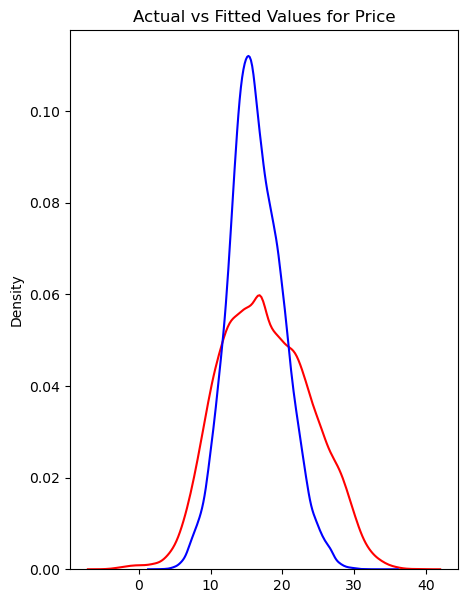

In [14]:
plt.figure(figsize=(5, 7))

ax = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values for Price')

plt.show()
plt.close()

In [15]:
ytrain_pred = regressor.predict(X_train)
df_restrain=pd.DataFrame({'Actual':Y_train, 'Predicted':ytrain_pred})

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_train, ytrain_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_train, ytrain_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_train, ytrain_pred)))

Mean Absolute Error: 4.052388124170218
Mean Squared Error: 26.18925137148359
Root Mean Squared Error: 5.117543489945502


In [16]:
#R squared value
regressor.score(X_train, Y_train)

0.33883715114607915

In [22]:
# Calculate the absolute errors
errors = abs(ytrain_pred - Y_train)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), )

Mean Absolute Error: 4.05
